In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
df=pd.read_csv("/content/default of credit card clients.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,dpnm
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
original=df#to preserve the original data frame 

In [ ]:
df.shape

(30000, 25)

By shape of the data frame we can understand that there are 25 features(23 features, 1 label, 1 id) and there are 30,000 observations.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_1      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [ ]:
df.isna().sum().sum()

0

no Nan or null values so data is complete.

In [ ]:
df.drop("ID",axis=1,inplace=True)

removing non contributing factors like name id is priliminary step so dropping id column.

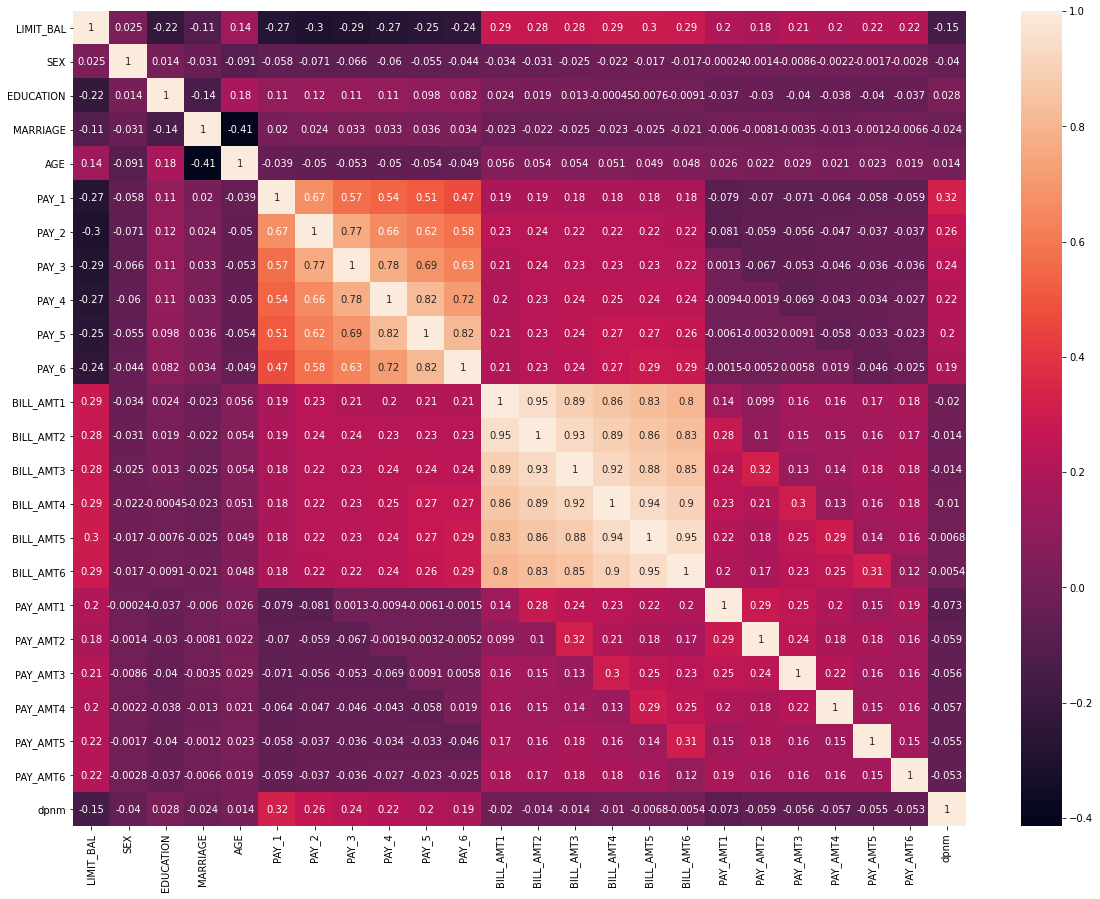

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

bill amounts and pay attributes are highly related. So to prevent multi collinearity higly related attributes can be dropped. But even they are prportional we can let them be as they may have some hidden inferential feature in classification point of view.

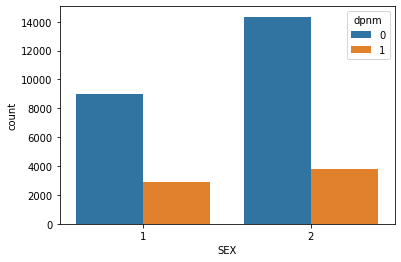

In [ ]:
sns.countplot(x='SEX',hue='dpnm',data=df)

1 - Male, 2- Female we can infer that higher percentage of men dont pay the credit card bills

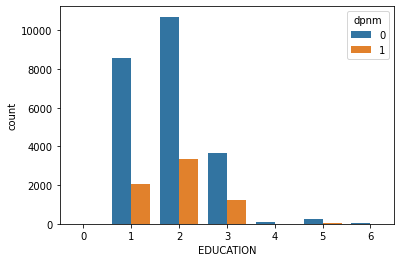

In [ ]:
sns.countplot(x='EDUCATION',hue='dpnm',data=df)

education dosent tell much as at every level it relatively same

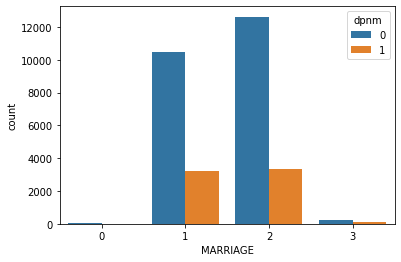

In [ ]:
sns.countplot(x='MARRIAGE',hue='dpnm',data=df)

1- married, 2- single, 3- others, by the above plot we can say that higher percent of married people are not able to pay their credit bills back.

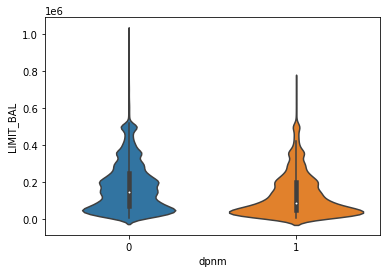

In [ ]:
sns.violinplot(y="LIMIT_BAL",x="dpnm",data=df)

we can say that debts of smaller amounts are not paid compared to debts of higher amount.

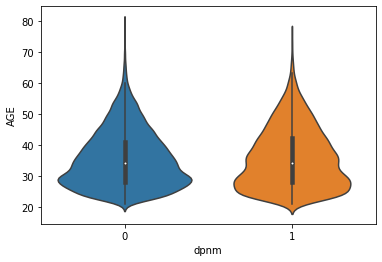

In [ ]:
sns.violinplot(y="AGE",x="dpnm",data=df)

younger people are more likely to keep bill dues than the elder one's.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


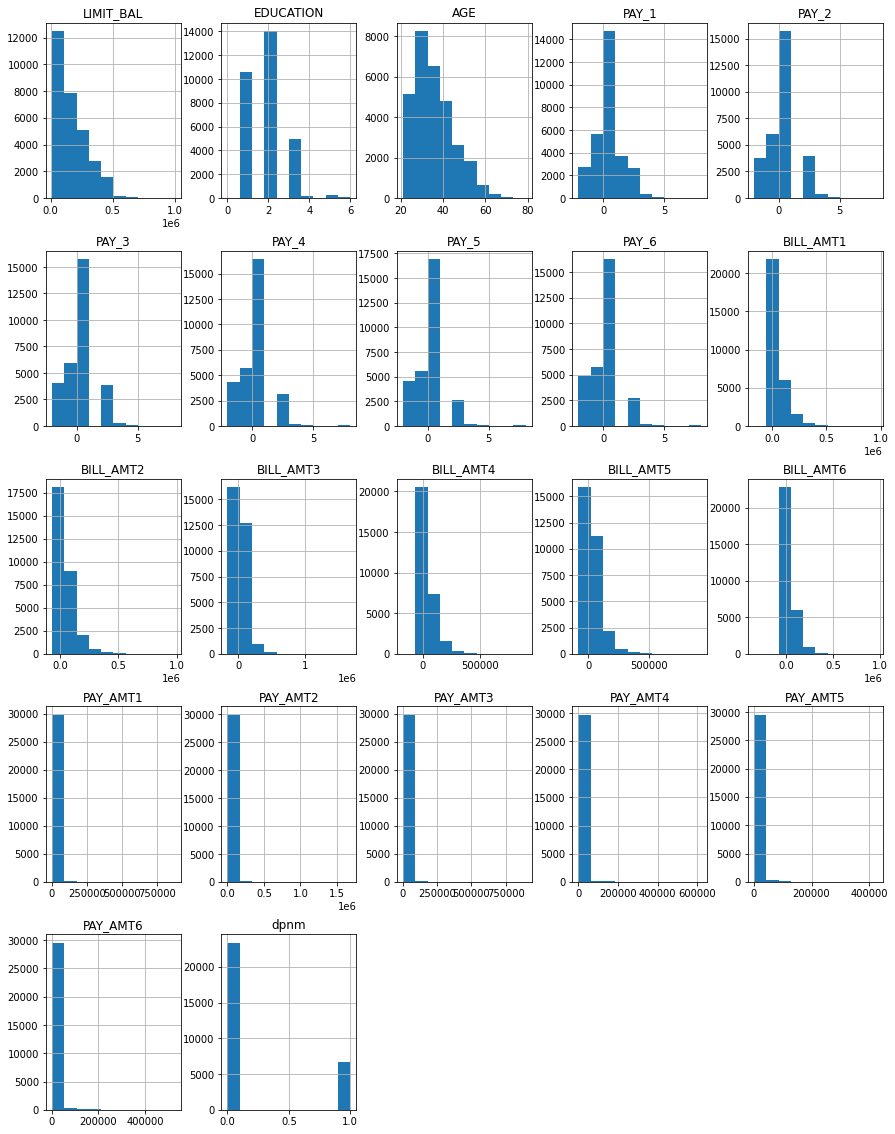

In [78]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

1. only less than 30% of the people wont be able to pay the debt(default).
2. all pay attributes have a peak at 1 which means most of the payments are done with a due of one month.
3. 
we can observe unbalenced features and the wide range of values. which needs to be dealed.

In [ ]:
df.drop_duplicates(inplace=True)

As id is dropped similar data can be matched as there is no primary key now we can remove redundant info which adds no value in the training process. 

In [ ]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'dpnm'],
      dtype='object')

there are many categorical features but only few are hot encoded beacause other attributes have wide range of discrete values which can be interpreted as real values.

In [ ]:
df[["SEX","MARRIAGE"]]=df[["SEX","MARRIAGE"]].astype(str)

In [91]:
df1=pd.get_dummies(df,drop_first=True)

scaling is a very important as learning rate is same for all features, data in large scale needs to be less sensitive and data in small range needs to be more sensitive so to deal with this we need to scale the data.

In [90]:
from sklearn import preprocessing

In [92]:
X=df1
Y=df1["dpnm"]
X=X.drop("dpnm",axis=1)

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=25)

In [95]:
X_train=preprocessing.scale(X_train)
X_test=preprocessing.scale(X_test)
X_test

array([[ 0.24590725,  0.17473981, -0.71522554, ..., -0.94064699,
         0.96398156, -0.10162576],
       [-0.06278197, -1.08742573,  0.37850298, ..., -0.94064699,
         0.96398156, -0.10162576],
       [-1.06602194,  0.17473981, -0.16836128, ...,  1.06309807,
        -1.03736424, -0.10162576],
       ...,
       [ 0.01439034,  0.17473981,  1.0347401 , ..., -0.94064699,
         0.96398156, -0.10162576],
       [ 1.09480262,  0.17473981, -0.05898843, ..., -0.94064699,
         0.96398156, -0.10162576],
       [-1.14319425,  0.17473981, -1.15271695, ..., -0.94064699,
         0.96398156, -0.10162576]])

# Logistic Regression: model1

In [96]:
model1=LogisticRegression()
model1.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [97]:
model1.score(X_test,y_test)

0.8103333333333333

In [98]:
score=cross_val_score(model1, X_train, y_train, cv=5).mean()

In [99]:
score

0.8115238095238094

In [100]:
from sklearn.metrics import confusion_matrix
conMatrix = confusion_matrix(y_test,model1.predict(X_test))
conMatrix

array([[6800,  186],
       [1521,  493]])

we can see 1521 in (1,0) position which a not a very good sign which means our model is not much predicting positive for actually positive terms. The count is comparitively high so it will be better if further decreased.

In [101]:
print("correct predictions:",conMatrix[0,0]+conMatrix[1,1])
print("wrong predictions:",conMatrix[0,1]+conMatrix[1,0])

correct predictions: 7293
wrong predictions: 1707


In [105]:
model1.coef_

array([[-7.96917682e-02, -7.11453248e-02,  5.53872602e-02,
         6.56486022e-01,  9.41416506e-02,  6.19855066e-02,
         3.98676893e-02,  4.77860462e-02,  6.61138443e-03,
        -4.12481649e-01,  2.00534868e-01, -3.36034825e-02,
         1.02905274e-01,  3.84631918e-02,  2.72060807e-04,
        -2.94903943e-01, -2.24637847e-01, -6.51439711e-02,
        -3.70236573e-02, -3.84197847e-02, -4.65002506e-02,
        -5.12693710e-02,  4.87371604e-01,  4.00065220e-01,
         1.06626664e-01]])

Observations:
we can see that in |coef| none of the coef are comparitively very small so all are contributing to the model except 2.72060807e-04 so its clear that feature of this coefficient is not contributing much so can be dropped.

# Decision Tree: model2

In [106]:
from sklearn import tree
import graphviz 

In [107]:
model2= tree.DecisionTreeClassifier(max_depth=4, criterion='gini', random_state=25)
model2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=25, splitter='best')

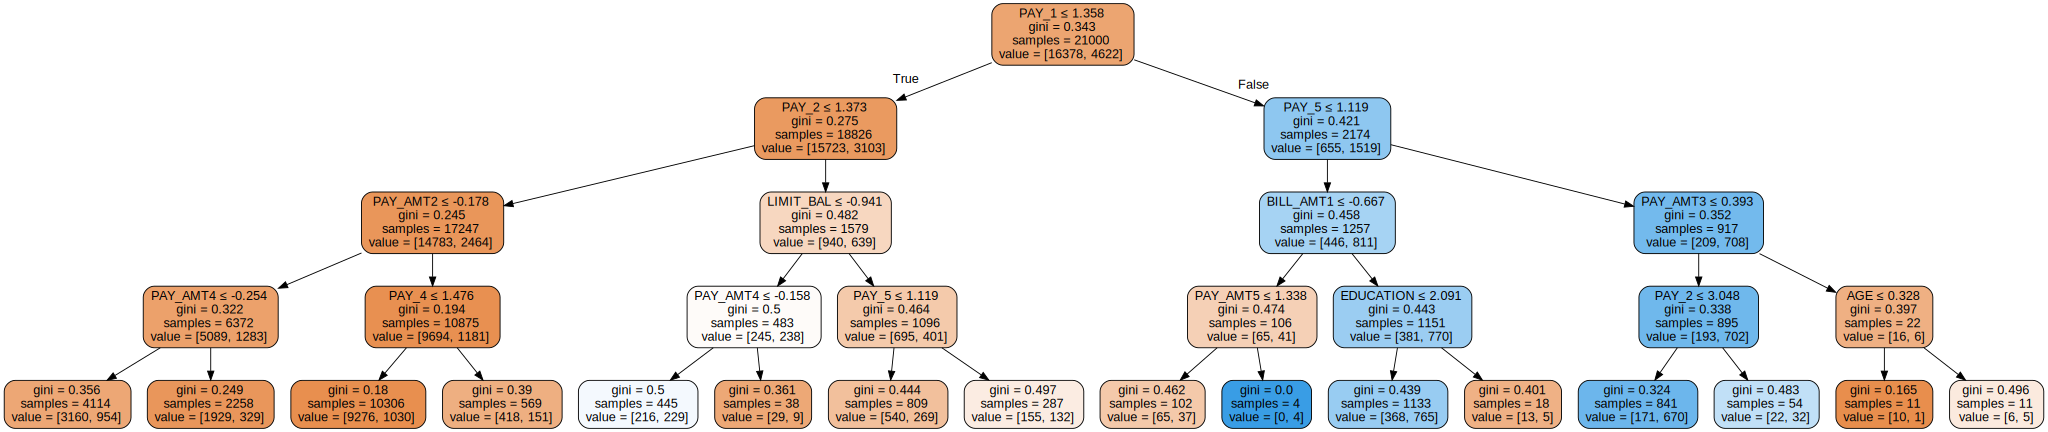

In [108]:
dot_data = tree.export_graphviz(model2, out_file=None, feature_names=X.columns, filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [109]:
crossvalidation=cross_val_score(model2, X_train, y_train, cv=10).mean()

In [110]:
print('Accuracy: ' , model2.score(X_test, y_test))
print('Cross-validation accuracy:' , crossvalidation)

Accuracy:  0.8142222222222222
Cross-validation accuracy: 0.8206666666666667


A bit of improvement can be seen in accuracy and cross validation accuracy of the model.

In [111]:
conMatrix1=confusion_matrix(y_test,model2.predict(X_test))
conMatrix1

array([[6625,  361],
       [1311,  703]])

In [112]:
print("correct predictions:",conMatrix1[0,0]+conMatrix1[1,1])
print("wrong predictions:",conMatrix1[0,1]+conMatrix1[1,0])

correct predictions: 7328
wrong predictions: 1672


predictions accurcy is increased with deacrease in false negatives count so it is obviously a better model compared to model 1.

# KNN: model3


In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
acc = knn.score(X_test,y_test)
print("The accuracy score for KNN is: ",acc)

The accuracy score for KNN is:  0.7877777777777778


In [ ]:
confusion_matrix(y_test,knn.predict(X_test))

array([[6661,  325],
       [1585,  429]])

# SVM: Model 4

In [113]:
svm = SVC()
svm.fit(X_train, y_train)
acc = svm.score(X_test,y_test)
print("The accuracy score for SVM is:",acc)

The accuracy score for SVM is: 0.8183333333333334


In [ ]:
conmatrix3=confusion_matrix(y_test,svm.predict(X_test))
conmatrix3

array([[6708,  278],
       [1350,  664]])

In [ ]:
print("correct predictions:",conmatrix3[0,0]+conmatrix3[1,1])
print("wrong predictions:",conmatrix3[0,1]+conmatrix3[1,0])

correct predictions: 7372
wrong predictions: 1628


So, by taking accuracy and confusion matrix into consideration we can say that all above 4 models order of their performances is Decision Tree, SVM, Logistic Regression, KNN.